# Figures from: Global Oscillation of Shell H-ingestion as revealed by 3D Hydrodynamic Simulations of Turbulent He-shell flash convection in a Low-Metallicity AGB Star

In [1]:
import sys
sys.path.insert(0, '/user/jericho/PyPPM')
import ppmpy.ppm as ppm
%matplotlib nbagg
import numpy as np
import nugridpy.mesa as ms
import nugridpy.utils as utils
import nugridpy.astronomy as ast
sys.path.insert(0,'/data/ppm_rpod2/lib/lcse/')
import rprofile as rprofile
%load_ext autoreload
%autoreload 2
cb = utils.colourblind

## Fig. 1

In [3]:
hd = ms.history_data('/data/ppm_rpod2/Stellar_models/AGBTP_M2.0Z1.e-5/M2.00Z1.e-5/LOGS/')

Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


<IPython.core.display.Javascript object>


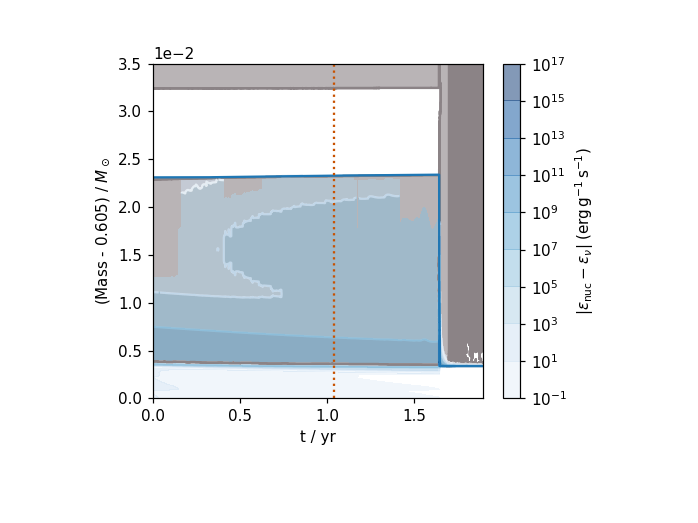

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus age
plotting contours
plotting patches
plotting abund boundaries


In [8]:
import numpy as np

modstart = 15000; modstop = 32000
xres = 2000; yres = 2000
ylims = [0.605, 0.64]
ppm_mod_num = 24150

mod_num = hd.get('model_number')
age = hd.get('star_age')
idx = np.argmin(np.abs(mod_num - ppm_mod_num))
ppm_age = age[idx]

idx0 = np.argmin(np.abs(mod_num - modstart))
age0 = age[idx0]

ifig = 1; pl.close(ifig); fig = pl.figure(ifig)
hd.kip_cont(ifig=ifig, modstart=modstart, modstop=modstop,
            t0_model=modstart, ixaxis='age', xres=xres, yres=yres, ylims=ylims)
pl.gca().ticklabel_format(style='sci', scilimits=(0,0), axis='both')
pl.axvline(ppm_age - age0, ls=':', color=cb(8))
pl.xlabel('t / yr')
fig.tight_layout()

## Fig. 2

<IPython.core.display.Javascript object>


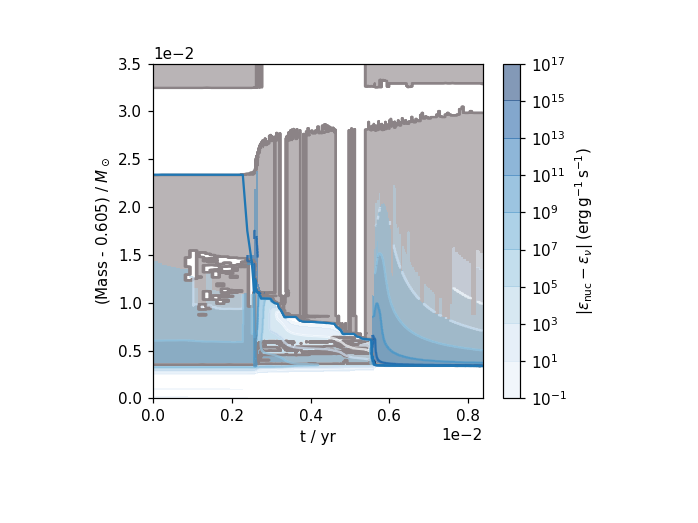

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus age
plotting contours
plotting patches
plotting abund boundaries


In [10]:
modstart = 29400
modstop = 29850
xres = 2000
yres = 2000
ylims = [0.605, 0.64]

ifig = 2; pl.close(ifig); fig = pl.figure(ifig)
hd.kip_cont(ifig=ifig, modstart=modstart, modstop=modstop,
            t0_model=modstart, ixaxis='age', xres=xres, yres=yres, ylims=ylims)
pl.gca().ticklabel_format(style='sci', scilimits=(0,0), axis='both')
pl.xlabel('t / yr')
fig.tight_layout()

## Fig 3

In [3]:

mesa_logs_path = '/data/ppm_rpod2/Stellar_models/AGBTP_M2.0Z1.e-5/M2.00Z1.e-5/LOGS/'
mesa_model_num = 24150
mesa_prof = ms.mesa_profile(mesa_logs_path, mesa_model_num)
# convert the mesa variables to cgs units
mesa_r = ast.rsun_cm*mesa_prof.get('radius')
mesa_p = 10**mesa_prof.get('logP')
mesa_rho = 10**mesa_prof.get('logRho')
mesa_mu = mesa_prof.get('mu')
mesa_T = 10**mesa_prof.get('logT')

# get the PPM models in cgs units
F4_prof = ppm.yprofile('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4/')
F4_r = 1e8*F4_prof.get('Y', fname = 0, resolution = 'l')
F4_p = 1e19*F4_prof.get('P', fname = 0, resolution = 'l')
F4_rho = 1e3*F4_prof.get('Rho', fname = 0, resolution = 'l')
F4_FV = F4_prof.get('FV H+He', fname = 0, resolution = 'l')
F4_airmu = 1.39165
F4_cldmu = 0.725
F4_mu = F4_prof.get('mu', fname = 0, resolution = 'l',
                       airmu=F4_airmu, cldmu=F4_cldmu)
F4_T = 1e9*F4_prof.get('T9', fname = 0, resolution = 'l',
                       airmu=F4_airmu, cldmu=F4_cldmu)

# cut out the physical domain
F4_r_bot = 8e8
F4_r_top = 33e8
F4_idx_bot = np.argmin(np.abs(F4_r - F4_r_bot))
F4_idx_top = np.argmin(np.abs(F4_r - F4_r_top))
F4_r = F4_r[F4_idx_top:F4_idx_bot]
F4_p = F4_p[F4_idx_top:F4_idx_bot]
F4_rho = F4_rho[F4_idx_top:F4_idx_bot]
F4_mu = F4_mu[F4_idx_top:F4_idx_bot]
F4_T = F4_T[F4_idx_top:F4_idx_bot]

G2_prof = ppm.yprofile('/data/ppm_rpod2/YProfiles/sakurai/G2/')
G2_r = 1e8*G2_prof.get('Y', fname = 0, resolution = 'l')
G2_p = 1e19*G2_prof.get('P', fname = 0, resolution = 'l')
G2_rho = 1e3*G2_prof.get('Rho', fname = 0, resolution = 'l')
G2_FV = G2_prof.get('FV H+He', fname = 0, resolution = 'l')
G2_airmu = 1.53796859981
G2_cldmu = 0.634920634921
G2_mu = G2_prof.get('mu', fname = 0, resolution = 'l', \
                       airmu=G2_airmu, cldmu=G2_cldmu)
G2_T = 1e9*G2_prof.get('T9', fname = 0, resolution = 'l', \
                       airmu=G2_airmu, cldmu=G2_cldmu)

# cut out the physical domain
G2_r_bot = 7e8
G2_r_top = 22e8
G2_idx_bot = np.argmin(np.abs(G2_r - G2_r_bot))
G2_idx_top = np.argmin(np.abs(G2_r - G2_r_top))
G2_r = G2_r[G2_idx_top:G2_idx_bot]
G2_p = G2_p[G2_idx_top:G2_idx_bot]
G2_rho = G2_rho[G2_idx_top:G2_idx_bot]
G2_mu = G2_mu[G2_idx_top:G2_idx_bot]
G2_T = G2_T[G2_idx_top:G2_idx_bot]

cb = utils.colourblind

983 in profiles.index file ...
Found and load nearest profile for cycle 24150
reading /data/ppm_rpod2/Stellar_models/AGBTP_M2.0Z1.e-5/M2.00Z1.e-5/LOGS//log787.data ...
 reading ...100% 



<IPython.core.display.Javascript object>


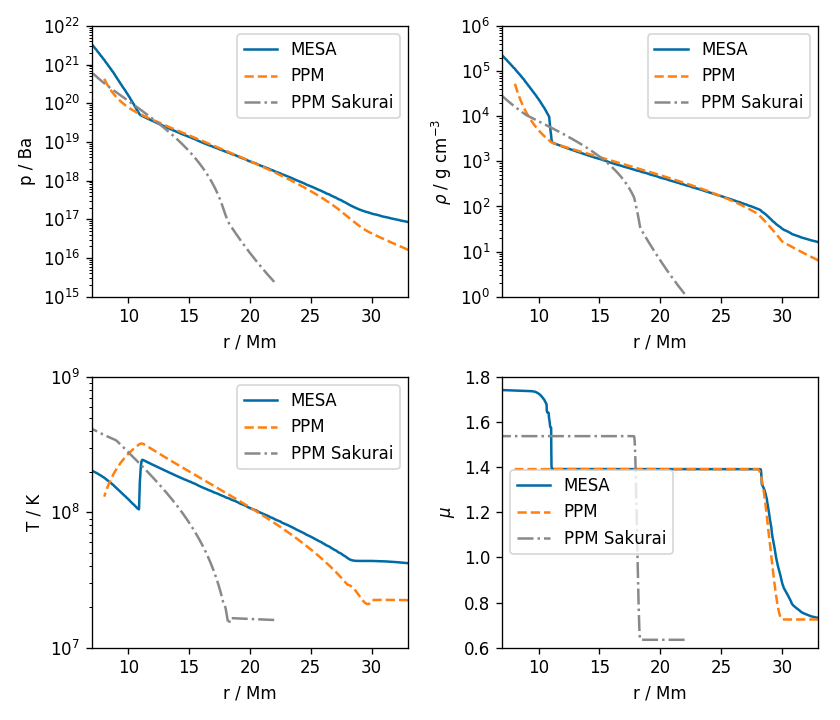

In [31]:
ifig = 1; pl.close(ifig); fig = pl.figure(ifig, figsize=(7., 6.), dpi=120)

xlim = (G2_r_bot/1e8, F4_r_top/1e8)

ax1 = fig.add_subplot(221)
ax1.semilogy(mesa_r/1e8, mesa_p, ls = '-', color = cb(5), label = "MESA")
ax1.semilogy(F4_r/1e8, F4_p, ls = '--', color = cb(1), label = "PPM")
ax1.semilogy(G2_r/1e8, G2_p, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax1.set_xlim(xlim)
ax1.set_ylim((1e15, 1e22))
ax1.set_xlabel('r / Mm')
ax1.set_ylabel('p / Ba')
ax1.legend(loc = 0)

ax2 = fig.add_subplot(222)
ax2.semilogy(mesa_r/1e8, mesa_rho, ls = '-', color = cb(5), label = "MESA")
ax2.semilogy(F4_r/1e8, F4_rho, ls = '--', color = cb(1), label = "PPM")
ax2.semilogy(G2_r/1e8, G2_rho, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax2.set_xlim(xlim)
ax2.set_ylim((1e0, 1e6))
ax2.set_xlabel('r / Mm')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax2.legend(loc = 0)

ax3 = fig.add_subplot(223)
ax3.semilogy(mesa_r/1e8, mesa_T, ls = '-', color = cb(5), label = "MESA")
ax3.semilogy(F4_r/1e8, F4_T, ls = '--', color = cb(1), label = "PPM")
ax3.semilogy(G2_r/1e8, G2_T, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax3.set_xlim(xlim)
ax3.set_ylim((1e7, 1e9))
ax3.set_xlabel('r / Mm')
ax3.set_ylabel('T / K')
ax3.legend(loc = 0)

ax4 = fig.add_subplot(224)
ax4.plot(mesa_r/1e8, mesa_mu, ls = '-', color = cb(5), label = "MESA")
ax4.plot(F4_r/1e8, F4_mu, ls = '--', color = cb(1), label = "PPM")
ax4.plot(G2_r/1e8, G2_mu, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax4.set_xlim(xlim)
ax4.set_ylim((0.6, 1.8))
ax4.set_xlabel('r / Mm')
ax4.set_ylabel(r'$\mu$')
ax4.legend(loc = 0)

fig.tight_layout()

## Fig 4

In [18]:
spec_dir = '/data/ppm_rpod2/spectra/data/'
dumps = [160, 340, 520, 700, 900]
markers = ['v', '^', '<', '>', 'o', 's']
colours = [9, 3, 5, 8, 1, 6]

<IPython.core.display.Javascript object>


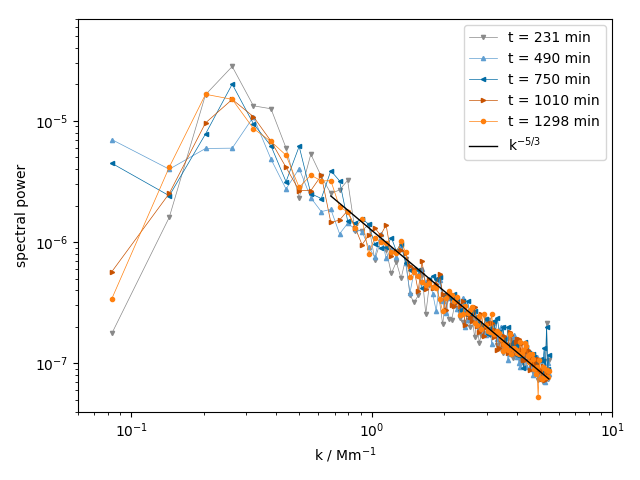

In [20]:
ifig = 1; pl.close(ifig); pl.figure(ifig)
for i in range(len(dumps)):
    t = F4_prof.get('t', fname = dumps[i] - 1, resolution = 'l', silent = False)[-1]
    
    rad = 17.
    fname = spec_dir + 'LZagb-{:04d}-Ur-{:02.0f}.ylmspc'.format(dumps[i], rad)
    data = np.loadtxt(fname)
    
    L = data[:, 0]
    k = np.sqrt(L*(L + 1.))/rad
    power = data[:, 1]
    
    pl.loglog(k, power, '-', lw=0.5, color=cb(colours[i]), marker=markers[i], \
               markevery=1, markersize=3., label='t = {:.0f} min'.format(t/60.))
    
pl.loglog(k[10:], 1.25e-6*k[10:]**(-5./3.), 'k-', lw=1., label=r'k$^{-5/3}$')
    
pl.legend(loc=1, ncol=1)
pl.xlim((6e-2, 1e1))
pl.ylim((4e-8, 7e-5))
pl.xlabel(r'k / Mm$^{-1}$')
pl.ylabel('spectral power')
pl.tight_layout()

# Fig 5 & 6

<IPython.core.display.Javascript object>


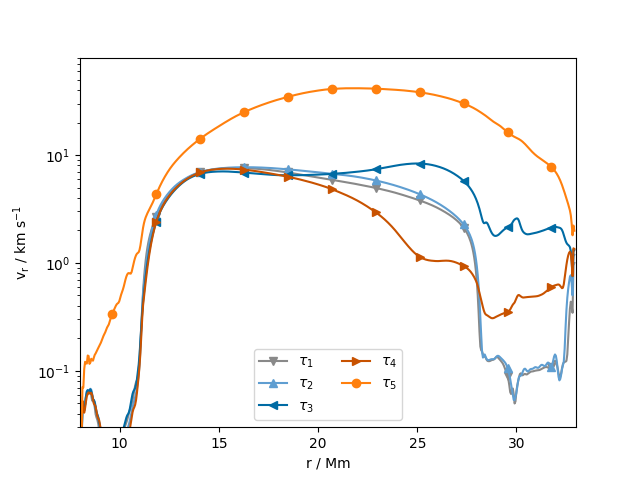

<IPython.core.display.Javascript object>


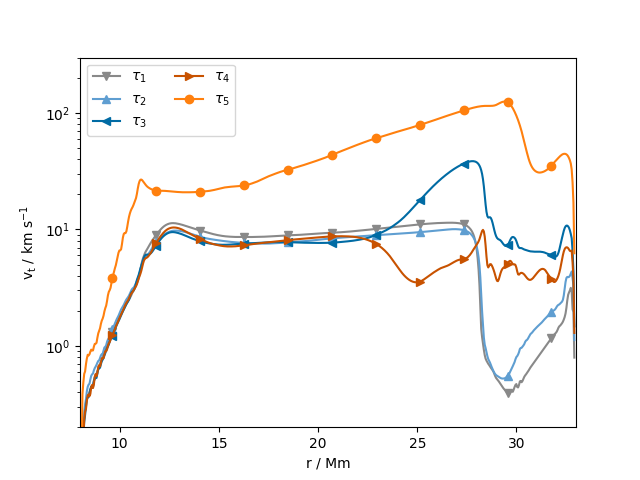

In [3]:
fname = [560, 970, 1469, 1630, 1909]
F4_prof = ppm.yprofile('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4/')
F4_prof.vprof_time(fname,11,comp = 'r',lims=[8., 33.,3e-2, 8e1],save=False,
                   initial_conv_boundaries=False,lw=1., ifig = 5)
F4_prof.vprof_time(fname,11,comp = 't',lims=[8., 33.,2e-1, 3e2],save=False,
                   initial_conv_boundaries=False,lw=1., ifig = 6)

## Fig 7

<IPython.core.display.Javascript object>


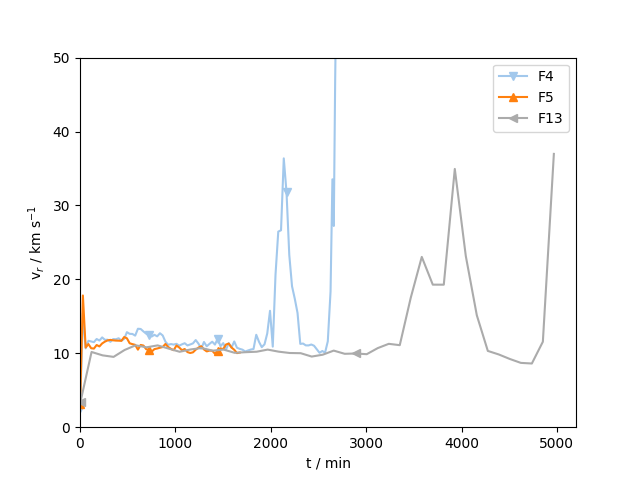

p


In [2]:
ppm.set_YProf_path('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/')
ppm.v_evolution(['F4','F5','F13'],11.5, 28.5,'tot','max',
            sparse = 20, ifig = 7,dumps=[0,2000], lims = [0., 5.2e3,0., 50.])

## Fig 8

<IPython.core.display.Javascript object>


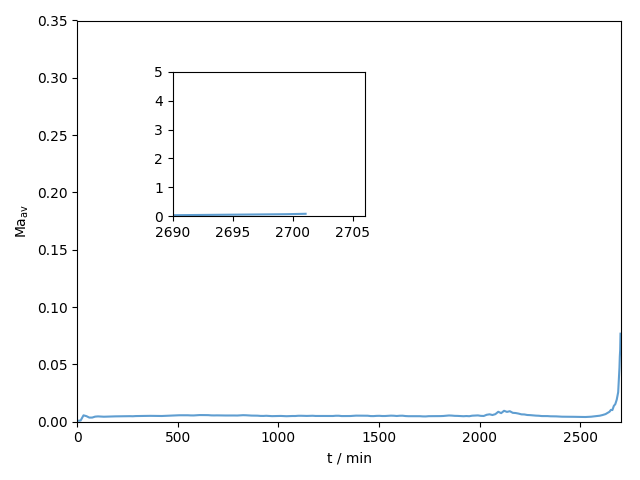

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [4]:
rp_set = rprofile.rprofile_set('/data/ppm_rpod2/RProfiles/AGBTP_M2.0Z1.e-5/F4/')
ppm.plot_mach_number(rp_set,F4_prof,range(1,1950,10),comp = 'mean',insert=True,lims=[0., 2706.,0., 0.35],
                 lims_insert =[2690., 2706.,0., 5. ])
#Plotting every 10th for speed

## Fig 9

<IPython.core.display.Javascript object>


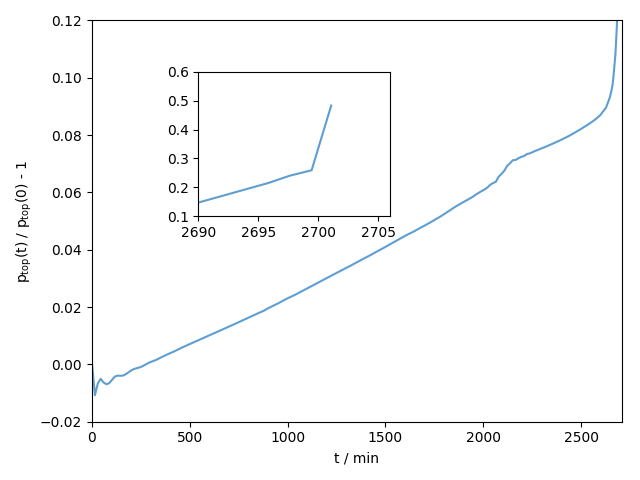

In [4]:
ppm.plot_p_top(F4_prof,range(0,1950,10),32.,insert=True,lims=[0., 2706.,-0.02, 0.12],
                 lims_insert =[2690., 2706.,0.1, 0.6 ])
#Plotting every 10th for speed

## Fig 10

Processing F4...
Processing will be done in 27 s.
Processing F5...
Processing will be done in 23 s.
Processing F13...
Processing will be done in 5 s.


<IPython.core.display.Javascript object>


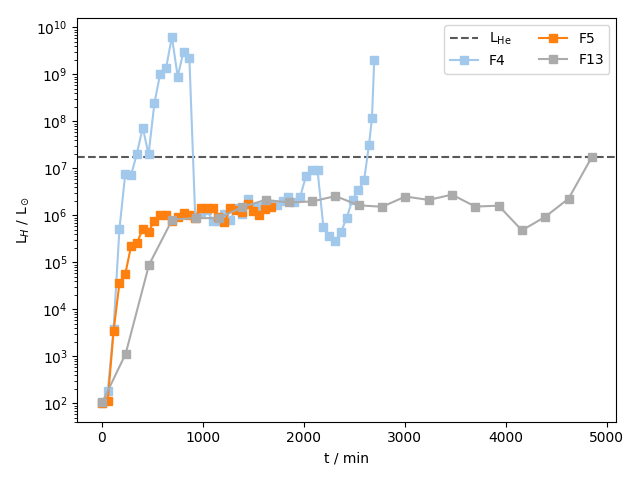

In [5]:
ppm.set_YProf_path('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/')
ppm.L_H_L_He_comparison(['F4','F5','F13'],sparse = 40)

## Fig 11

<IPython.core.display.Javascript object>


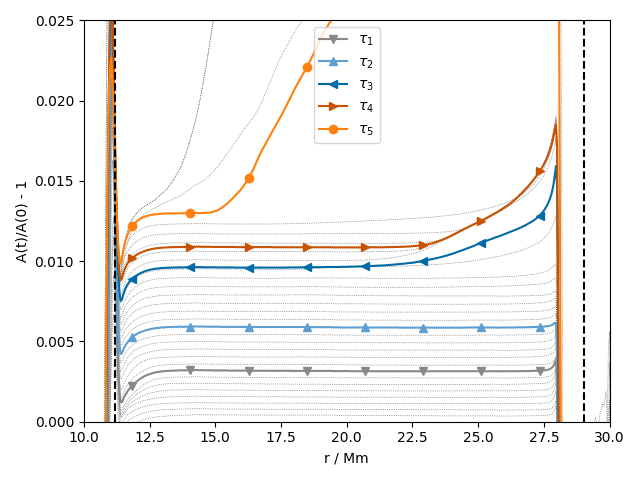

The closest time is at Ndump = 559
The closest time is at Ndump = 970
The closest time is at Ndump = 1469
The closest time is at Ndump = 1630
The closest time is at Ndump = 1908


In [8]:
#F4_prof = yprofile('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4')
F4_prof.Aprof_time(np.array([807., 1399., 2119., 2351., 2695.]),range(0,30,1),lims =[10., 30.,0., 2.5e-2],silent = True)

## Fig 14

<IPython.core.display.Javascript object>


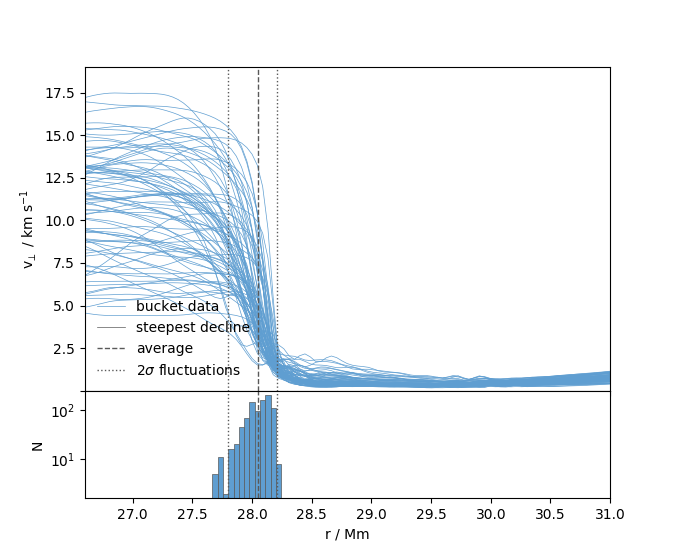

In [10]:
data_path = '/data/ppm_rpod2/RProfiles/AGBTP_M2.0Z1.e-5/F4/'
dump = 560
hist_dmin = dump - 5
hist_dmax = dump + 5
r_lim = (27.0, 30.5)
ut_lim = (1e-3, 19.)
dutdr_lim = (-0.099, 0.02)
ppm.upper_bound_ut(data_path,dump, hist_dmin, hist_dmax,r1 = r_lim[0],r2 = 31, derivative = False,
              ylims = [1e-3,19.])

## Fig. 15

<IPython.core.display.Javascript object>


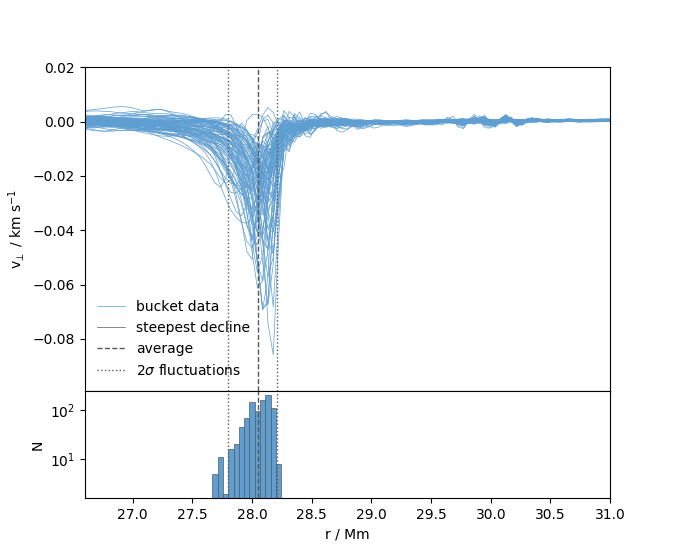

In [5]:
ppm.upper_bound_ut(data_path,dump, hist_dmin, hist_dmax,r1 = r_lim[0],r2 = 31, derivative = True,
              ylims = (-0.099, 0.02))

## Fig 20

<IPython.core.display.Javascript object>


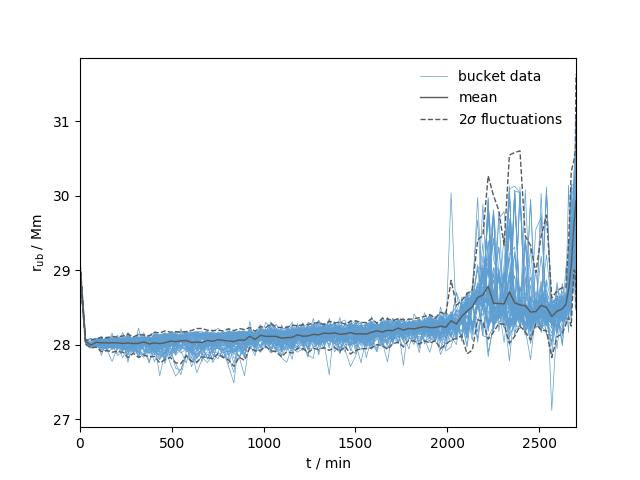

In [30]:
ppm.plot_boundary_evolution(data_path, 27., 31., 700,sparse=20)

## Fig 21

/user/jericho/PyPPM/ppmpy/ppm.py:5654: RuntimeWarning: invalid value encountered in divide
  p = rp.get_table('p')[0, :, :]
/user/jericho/PyPPM/ppmpy/ppm.py:5663: RuntimeWarning: invalid value encountered in greater
  threshold = 1e-3


<IPython.core.display.Javascript object>


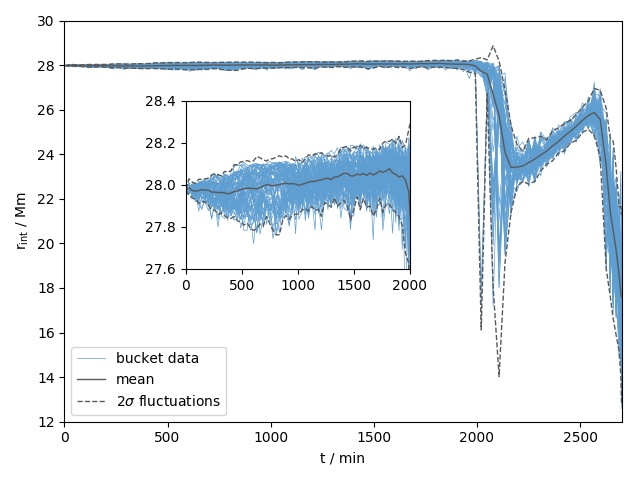

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [31]:
data_path = '/data/ppm_rpod2/RProfiles/AGBTP_M2.0Z1.e-5/F4/'
ppm.plot_boundary_evolution(data_path,None,None,r_int=True,r_ref=13.,gamma = 5./3.,insert = True,
                       lims = [0., 2e3,27.6, 28.4],sparse=20)

## Fig 22

Reading attributes from file  YProfile-01-1959.bobaaa
There are 1960 YProfile files in the /data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4 directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0
Processing will be done in 2 s.


<IPython.core.display.Javascript object>


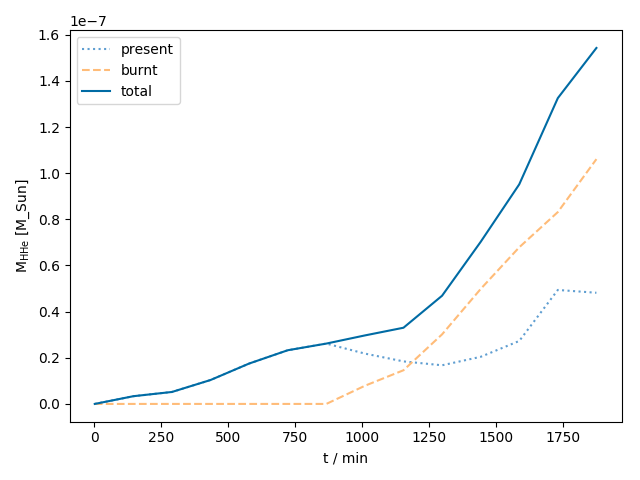

In [44]:
dumps = np.array(range(0,1400,100))
r1=27.7;r2=28.5
yprof.plot_entrainment_rates(dumps,r1,r2)

In [6]:
t = yprof.get('t')
print t[620]/60.

894.343333333


## Fig 28

<IPython.core.display.Javascript object>


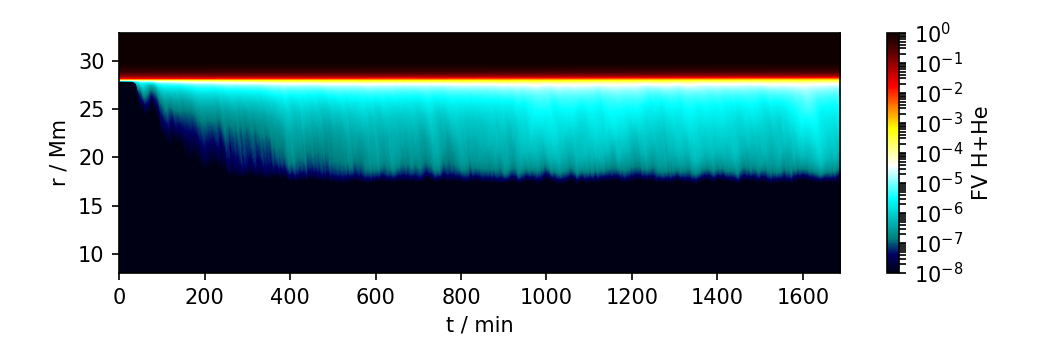

Processing will be done in 258 s.
Processing will be done in 238 s.
Processing will be done in 215 s.
Processing will be done in 192 s.
Processing will be done in 147 s.
Processing will be done in 112 s.
Processing will be done in 80 s.
Processing will be done in 55 s.
Processing will be done in 33 s.
Processing will be done in 10 s.


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:1298: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:1303: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


In [24]:
FV_cmap_str = '''
Cnot:   0 0.000000000 0.000000000 0.000000000
Cnot:   24 0.000000000 0.000000000 0.392156900
Cnot:   41 0.000000000 0.501960800 0.501960800
Cnot:   81 0.000000000 1.000000000 1.000000000
Cnot:   115 1.000000000 1.000000000 1.000000000
Cnot:   153 1.000000000 1.000000000 0.000000000
Cnot:   197 1.000000000 0.000000000 0.000000000
Cnot:   238 0.250980400 0.000000000 0.000000000
Cnot:   255 0.000000000 0.000000000 0.000000000
Anot:   0 0.000000000
Anot:   8 0.031372550
Anot:   20 0.062745100
Anot:   32 0.784313700
Anot:   133 1.000000000
Anot:   153 0.894117700
Anot:   197 0.243137300
Anot:   241 0.258823500
Anot:   255 0.000000000
'''
prof= ppm.yprofile('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F5/')
cmap = colourmap_from_str(FV_cmap_str, segment=(5, 251))
ifig = 1; pl.close(ifig); fig = pl.figure(ifig, figsize = (7., 2.25), dpi=150)
prof.spacetime_diagram('FV H+He', 1170, fig, rlim=(8., 33.), vlim=(1e-8, 1e0), cmap=cmap)
fig.tight_layout()

<IPython.core.display.Javascript object>


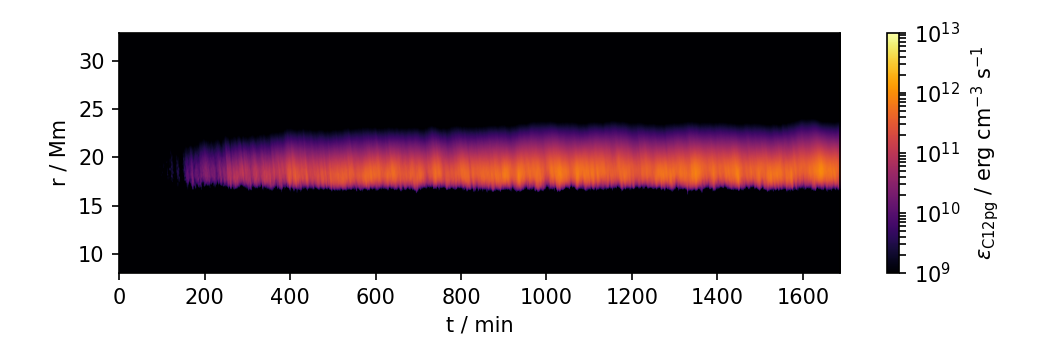

Processing will be done in 1648 s.
Processing will be done in 1764 s.
Processing will be done in 1727 s.
Processing will be done in 1720 s.
Processing will be done in 1723 s.
Processing will be done in 1696 s.
Processing will be done in 1684 s.
Processing will be done in 1656 s.
Processing will be done in 1626 s.
Processing will be done in 1607 s.
Processing will be done in 1580 s.
Processing will be done in 1550 s.
Processing will be done in 1526 s.
Processing will be done in 1503 s.
Processing will be done in 1479 s.
Processing will be done in 1459 s.
Processing will be done in 1435 s.
Processing will be done in 1412 s.
Processing will be done in 1390 s.
Processing will be done in 1367 s.
Processing will be done in 1342 s.
Processing will be done in 1319 s.
Processing will be done in 1284 s.
Processing will be done in 1233 s.
Processing will be done in 1186 s.
Processing will be done in 1137 s.
Processing will be done in 1093 s.
Processing will be done in 1054 s.
Processing will be d

In [26]:
airmu = 1.39165
cldmu = 0.725
fkair = 0.203606102635
fkcld = 0.885906040268
AtomicNoair = 6.65742024965
AtomicNocld = 1.34228187919
zero_intervals = None
ifig = 30; pl.close(ifig); fig = pl.figure(ifig, figsize = (7., 2.25), dpi=150)
prof.spacetime_diagram('enuc_C12pg', 1170, fig, rlim=(8., 33.), vlim=(1e9, 1e13), \
                       zero_intervals=zero_intervals, cmap='inferno', airmu=airmu, \
                       cldmu=cldmu, fkair=fkair, fkcld=fkcld, AtomicNoair=AtomicNoair, \
                       AtomicNocld=AtomicNocld, corr_fact=1.5)
fig.tight_layout()

<IPython.core.display.Javascript object>


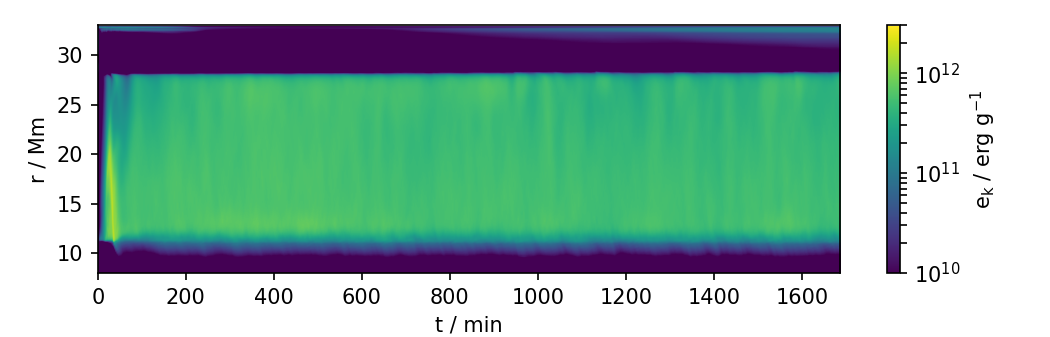

Processing will be done in 233 s.
Processing will be done in 221 s.
Processing will be done in 202 s.
Processing will be done in 179 s.
Processing will be done in 138 s.
Processing will be done in 103 s.
Processing will be done in 73 s.
Processing will be done in 43 s.
Processing will be done in 14 s.


In [28]:
ifig = 3; pl.close(ifig); fig = pl.figure(ifig, figsize = (7., 2.25), dpi=150)
prof.spacetime_diagram('Ek', 1170, fig, rlim=(8., 33.), vlim=(1e10, 3e12))
fig.tight_layout()